# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 1
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import itertools
import pandas as pd

In [2]:
netflix_titles = "netflix_titles.csv"
imdb_movies = "IMDb movies.csv"
imdb_ratings = "IMDb ratings.csv"

In [3]:
df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)

In [4]:
def replace_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna("None")

In [5]:
replace_nan(df1)
replace_nan(df2)
replace_nan(df3)

In [6]:
# Use a subset of the actual dataset
df1 = df1.head(250)

### Query 1

As seen below, movies surpass series.

In [7]:
print(df1.type.value_counts())

Movie      201
TV Show     49
Name: type, dtype: int64


### Query 2

As seen below, during the latest years (after 2015), Netflix invests more in Movies rather than TV shows.

In [8]:
# print(df1.query('release_year > 2015').type.describe())
print(df1.query('release_year > 2015').type.value_counts())

Movie      121
TV Show     43
Name: type, dtype: int64


### Query 3

The following list shows for each country the number of content it has on Netflix (for content > 2).

In [9]:
vc = df1.country.value_counts()
print(vc[vc > 2])

United States     88
India             20
None              10
South Korea        9
United Kingdom     8
Taiwan             8
Canada             7
Spain              7
Turkey             6
Indonesia          5
Nigeria            5
Australia          4
Italy              4
France             4
Japan              3
Brazil             3
Romania            3
Philippines        3
Germany            3
Name: country, dtype: int64


### Query 4

The content of each country can be seen on the following list.

In [10]:
df0 = pd.DataFrame(columns = ['country', 'listed_in'])
for country, genre in zip(df1.country, df1.listed_in):
    countries = [s.strip() for s in country.split(',')]
    genres = [s.strip() for s in genre.split(',')]
    for c, g in itertools.product(countries, genres):
        temp = {'country': c, 'listed_in': g}
        df0 = df0.append(temp, ignore_index=True)

df0_groupy = df0.groupby("country").listed_in.unique()

### Query 5

The following graph shows the actors with the most movies per country.

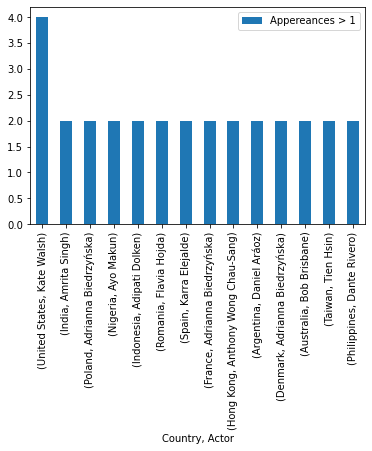

In [11]:
# For this question, no distinction were made between Movies and Tv Series

from collections import Counter

# Create dictionary with all actor appereances for each country
top_actors = {}
for cast, countries in zip(df1.cast, df1.country):
    for country in [s.strip() for s in countries.split(',')]:
        if country not in top_actors:
            top_actors[country] = [s.strip() for s in cast.split(',')]
        else:
            top_actors[country].extend([s.strip() for s in cast.split(',')])


# Create list of tuples ((country, most_famous_actor), appereances)
# for each country
data = []
for country, actor_list in top_actors.items():
    if country == "None":
        continue
    counter = Counter(actor_list)
    most_common = counter.most_common()
    
    if most_common[0][0] != "None" and most_common[0][1] > 1:
        data.append(((country, most_common[0][0]), most_common[0][1]))
    elif most_common[0][0] == "None" and len(most_common) > 1 and most_common[1][1] > 1:
        data.append(((country, most_common[1][0]), most_common[1][1]))

# Import data into a dataframe and plot
df0 = pd.DataFrame(data, columns = ['Country, Actor', 'Appereances > 1'])
df0.plot.bar(x='Country, Actor')   
None

### Query 6

The following graph shows the content of Netflix per age group.

Counter({'Mature': 91, 'Teens': 61, 'Older kids': 21, 'Little Kids': 15})
Counter({'Mature': 20, 'Teens': 17, 'Older kids': 8, 'Little Kids': 2})


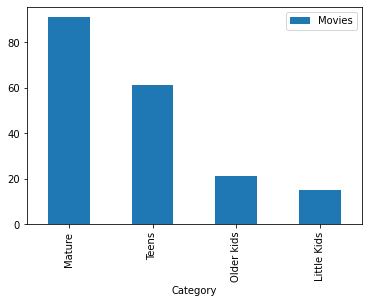

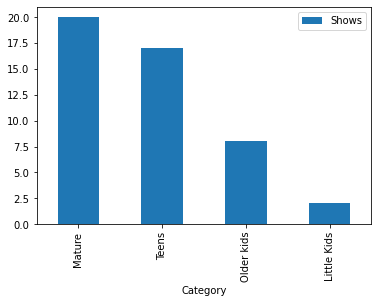

In [12]:
group_names = ["Little Kids","Older kids", "Teens", "Mature" ]
groups = {
    group_names[0]: ["G", "TV-Y", "TV-G"],
    group_names[1]: ["PG, TV-Y7", "TV-Y7-FV", "TV-PG"],
    group_names[2]: ["PG-13", "TV-14"],
    group_names[3]: ["R", "NC-17", "TV-MA"]
}

c_movies = Counter()
c_shows = Counter()
for r, t in zip(df1.rating, df1.type):
    for i in range(len(group_names)):
        if r in groups[group_names[i]]:
            if t == "Movie":
                c_movies[group_names[i]] += 1
            elif t == "TV Show":
                c_shows[group_names[i]] += 1
print(c_movies)
print(c_shows)
df_movies = pd.DataFrame.from_dict(c_movies, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Movies' })
df_shows = pd.DataFrame.from_dict(c_shows, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Shows' })
df_movies.plot.bar(x='Category')   
df_shows.plot.bar(x='Category')   
None

### Query 7

The following graph shows how much content gets released which month (accumulatively).

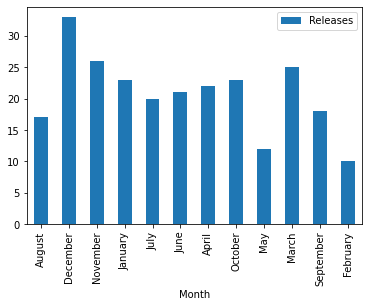

In [13]:
c = Counter()
for d in df1.date_added:
    d = d.split()[0]
    c[d] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Month', 0: 'Releases' })
df0.plot.bar(x='Month')
None

### Query 8

The following graph shows the number of content per genre.

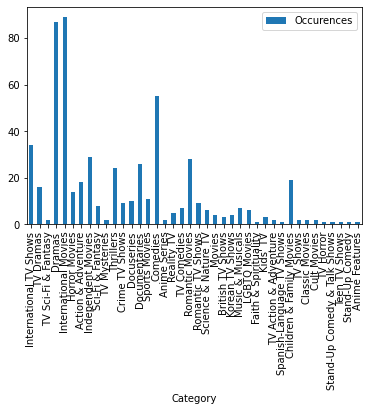

In [14]:
c = Counter()
for category_list in df1.listed_in:
    for category in [s.strip() for s in category_list.split(',')]:
        c[category] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Occurences' })
df0.plot.bar(x='Category')
None

### Query 9

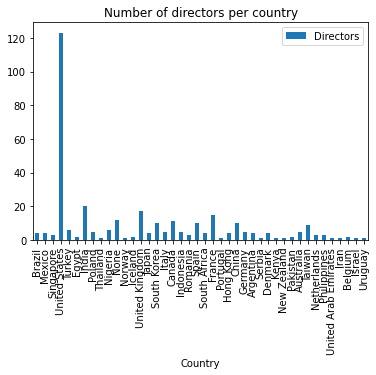

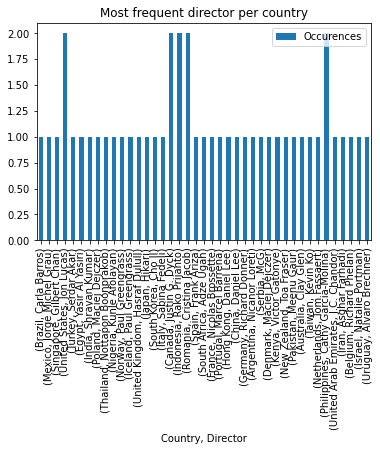

In [15]:
from collections import defaultdict
c = Counter()
directors_per_country = defaultdict(Counter)

for country_list, director_list in zip(df1.country, df1.director):
    for country in [s.strip() for s in country_list.split(',')]:
        for director in [s.strip() for s in director_list.split(',')]:
            c[country] += 1
            directors_per_country[country][director] += 1

data = []
for country, directors in directors_per_country.items():
    if country == "None":
        continue
    if directors.most_common()[0][0] != "None":
        data.append(((country, directors.most_common()[0][0]), directors.most_common()[0][1]))
    else:
        if len(directors) < 2:
            continue
        data.append(((country, directors.most_common()[1][0]), directors.most_common()[1][1]))

df00 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Country', 0: 'Directors' })
df00.plot.bar(x='Country', title="Number of directors per country")
None   
df01 = pd.DataFrame(data, columns = ['Country, Director', 'Occurences'])
df01.plot.bar(x='Country, Director', title="Most frequent director per country")   
None

### Query 10

The following graph shows how many seasons TV Series last.

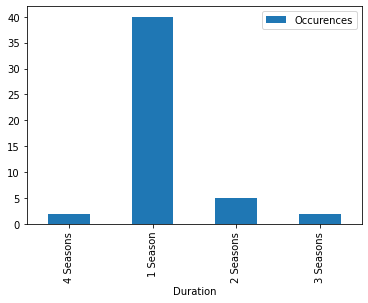

In [16]:
c = Counter()
for type, duration in zip(df1.type, df1.duration):
    if type != "TV Show":
        continue
    c[duration] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Duration', 0: 'Occurences' })
df0.plot.bar(x='Duration')
None

### Query 11

The following list shows the top 10 rated movies on Netflix, based on ratings from IMDb.

In [17]:
top_n = 10

df0 = pd.merge(df2[['imdb_title_id', 'title']], df1[['show_id', 'title']], how='inner', on='title')
df0 = pd.merge(df0, df3[['imdb_title_id', 'weighted_average_vote']], how='inner')

print(df0[['title', 'weighted_average_vote']].sort_values(by='weighted_average_vote', ascending=False)[:top_n])

                     title  weighted_average_vote
14                3 Idiots                    8.4
15                2 States                    8.2
49  A Billion Colour Story                    7.9
4              3 Deewarein                    7.8
33                    1983                    7.7
5                        9                    7.7
19            A Single Man                    7.6
13                   A Sun                    7.6
29                  5 to 7                    7.1
40         A Second Chance                    7.1


## Recommendation System

For the following part, explanations are made using python comments alongside code.

In [18]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [19]:
# Create corpus from titles and descriptions from the whole dataset
df1 = pd.read_csv(netflix_titles)
corpus = [title + ' ' + description for title, description in zip(df1.title, df1.description)]
# print(corpus)

In [20]:
# Stem corpus
stemmer = SnowballStemmer("english")
corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in corpus]
# print(corpus)

### Part 1

In [21]:
# boolean bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Create boolean bag of words vectorizer oject
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', binary=True)

# Create boolean bag of words representations
count_vectorizer_vectors = count_vectorizer.fit_transform(corpus)

#print(count_vectorizer.get_feature_names())
#print(count_vectorizer_vectors.toarray())
#print(count_vectorizer_vectors.shape)

In [22]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Create tf-idf vectorizer oject
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(1,2))

# Create tf-idf representations
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)

#print(tfidf_vectorizer.get_feature_names())
#print(tfidf_vectorizer_vectors.toarray())
#print(tfidf_vectorizer_vectors.shape)

### Part 2

In [23]:
topk = 10

In [24]:
# Jaccard distance

# Computes the Jaccard distance between the rows of `X`
# Originally from here 
# https://stackoverflow.com/questions/32805916/compute-jaccard-distances-on-sparse-matrix
def pairwise_jaccard(X):
    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = 1.0 - intrsct / unions
    return dist

# Create matrix with distances of all content pairs
jaccard_distance = pairwise_jaccard(count_vectorizer_vectors).tolist()

In [25]:
# Create dictionary with the `topk` most similar titles for a given title usign Boolean BoW
jaccard_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), jaccard_distance)
}

In [26]:
# Cosine distance

from sklearn.metrics import pairwise_distances

# Create matrix with distances of all content pairs
cosine_distance = pairwise_distances(X=tfidf_vectorizer_vectors, metric='cosine').tolist()

In [27]:
# Create dictionary with the `topk` most similar titles for a given title usign TF-IDF
cosine_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), cosine_distance)
}

### Part 3

In [28]:
def get_similar_movies(title, N=10, method='boolean_bow'):
    methods_available = ['boolean_bow', 'tf_idf']
    
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    if method == methods_available[0]:
        return jaccard_similar_content[title][:N]
    elif method == methods_available[1]:
        return cosine_similar_content[title][:N]

In [29]:
# Print some examples
query_index = 500
query_title = df1.title[query_index]
query_description = df1.description[query_index]
print("QUERY:\n")
print("title:\n\t%s" % query_title)
print("description:\n\t%s\n" % query_description)
print("===============================================")
print("\nBOOLEAN BOW RESULTS:\n")
for title in get_similar_movies(query_title, N=5, method='boolean_bow'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])
print("===============================================")
print("\nTF-IDF RESULTS:\n")
for title in get_similar_movies(query_title, N=5, method='tf_idf'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])

QUERY:

title:
	Anaamika
description:
	As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.


BOOLEAN BOW RESULTS:

title:
	Nee Enge En Anbe
description:
	As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.

title:
	Kahaani
description:
	Pregnant and alone in the city of Kolkata, a woman begins a relentless search for her missing husband, only to find that nothing is what it seems.

title:
	The Bygone
description:
	His way of life under threat due to the oil fracking boom, a young rancher defends a Lakota woman and becomes entangled in human trafficking.

title:
	Thumper
description:
	After moving to a hardscrabble suburban California town, a young woman becomes dangerously entangled with a local drug enterprise.

title:
	Liar's Dice
description:
	A woman from a small mountain village dis

### Part 4

In [30]:
from heapq import heapify, heappush, heappushpop, nlargest
from scipy.spatial import distance

def get_similar_movies2(description, N=10, method='boolean_bow'):

    # Use a custom heap structure which keeps only the top n values 
    class TopnHeap():
        def __init__(self, n):
            self.h = []
            self.length = n
            heapify(self.h)

        def add(self, element):
            if len(self.h) < self.length:
                heappush(self.h, element)
            else:
                heappushpop(self.h, element)

        def get_topn(self):
            return nlargest(self.length, self.h)

        
    # Couple of value checks
    methods_available = ['boolean_bow', 'tf_idf']
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    # Added new description to pre existing corpus
    new_corpus = [description]
    new_corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in new_corpus]
    new_corpus = corpus + new_corpus
    #print(new_corpus)
    
    # Create an empty heap
    topn = TopnHeap(N) 
        
    # Get similar content according to boolean bow
    if method == methods_available[0]:
        count_vectorizer_vectors2 = count_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = count_vectorizer_vectors2[-1]
            v2 = count_vectorizer_vectors2[i]
            dist = distance.jaccard(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()] 
    
    # # Get similar content according to tf_idf
    elif method == methods_available[1]:
        tfidf_vectorizer_vectors2 = tfidf_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = tfidf_vectorizer_vectors2[-1]
            v2 = tfidf_vectorizer_vectors2[i]
            dist = distance.cosine(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()]
    

In [31]:
query_description = 'April 6th, 1917. As a regiment assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.'
print("QUERY:")
print("description:\n\t%s\n" % query_description)
print("===============================================")
print("\nBOOLEAN BOW RESULTS:\n")
for title in get_similar_movies2(query_description, N=5, method='boolean_bow'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])
print("===============================================")
print("\nTF-IDF RESULTS:\n")
for title in get_similar_movies2(query_description, N=5, method='tf_idf'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])

QUERY:
description:
	April 6th, 1917. As a regiment assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.


BOOLEAN BOW RESULTS:

title:
	Outback Truckers
description:
	Australia's toughest big-rig drivers brave wildfires, scorching deserts, treacherous downpours and chassis-deep mud to deliver their cargo on time.

title:
	Mohawk
description:
	During the War of 1812, two Native Americans and their British ally are pursued into enemy territory by American soldiers thirsting for revenge.

title:
	K-19: The Widowmaker
description:
	On board Russia's first nuclear ballistic submarine, Capt. Vostrikov must race against time to prevent a Chernobyl-like explosion.

title:
	Only the Dead
description:
	Given unprecedented access to soldiers and terrorists alike, journalist Michael Ware presents an epic, uncensored, intimate account of the Iraq War.

title:
	The Evil 